In [1]:
# Загрузка данных
import pandas as pd
data = pd.read_csv("../2/melbourne_housing.csv")

In [2]:
display(data.dtypes), display(data.head()), display(data.isnull().sum());

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

columns_and_types = {
  "Rooms": np.int64,
  "Type": None,
  "Price": np.int64,
  "Distance": np.float64,
  "Postcode": np.int64,
  "Bedroom2": np.int64,
  "Bathroom": np.int64,
  "Car": np.int64,
  "Landsize": np.float64,
  "BuildingArea": np.float64,
  "YearBuilt": np.int64,
  "Lattitude": np.float64,
  "Longtitude": np.float64,
  "Propertycount": np.int64,
}

data = data[list(columns_and_types.keys())]
data.dropna(axis=0, how='any', inplace=True)
data = data.astype({k: v for k,v in columns_and_types.items() if v is not None})

type_encoder = LabelEncoder()
data["Type"] = type_encoder.fit_transform(data["Type"])

In [4]:
display(data.shape), display(data.dtypes)

(8887, 14)

Rooms              int64
Type               int64
Price              int64
Distance         float64
Postcode           int64
Bedroom2           int64
Bathroom           int64
Car                int64
Landsize         float64
BuildingArea     float64
YearBuilt          int64
Lattitude        float64
Longtitude       float64
Propertycount      int64
dtype: object

(None, None)

In [5]:
data.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,0,1035000,2.5,3067,2,1,0,156.0,79.0,1900,-37.8079,144.9934,4019
4,3,0,1465000,2.5,3067,3,2,0,134.0,150.0,1900,-37.8093,144.9944,4019
6,4,0,1600000,2.5,3067,3,1,2,120.0,142.0,2014,-37.8072,144.9941,4019
11,3,0,1876000,2.5,3067,4,2,0,245.0,210.0,1910,-37.8024,144.9993,4019
14,2,0,1636000,2.5,3067,2,1,2,256.0,107.0,1890,-37.8060,144.9954,4019


In [6]:
from sklearn.preprocessing import MinMaxScaler

sc2 = MinMaxScaler()
for col in data.columns:
  data[col] = sc2.fit_transform(data[[col]])

In [7]:
data.head()

,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,0.090909,0.0,0.101928,0.052743,0.068577,0.166667,0.000,0.0,0.003645,0.025386,0.855407,0.477684,0.516625,0.17616
4,0.181818,0.0,0.150412,0.052743,0.068577,0.250000,0.125,0.0,0.003131,0.048201,0.855407,0.475859,0.517532,0.17616
6,0.272727,0.0,0.165633,0.052743,0.068577,0.250000,0.000,0.2,0.002804,0.045630,0.993925,0.478596,0.517260,0.17616
11,0.181818,0.0,0.196753,0.052743,0.068577,0.333333,0.125,0.0,0.005724,0.067481,0.867558,0.484853,0.521976,0.17616
14,0.090909,0.0,0.169692,0.052743,0.068577,0.166667,0.000,0.2,0.005981,0.034383,0.843256,0.480161,0.518439,0.17616


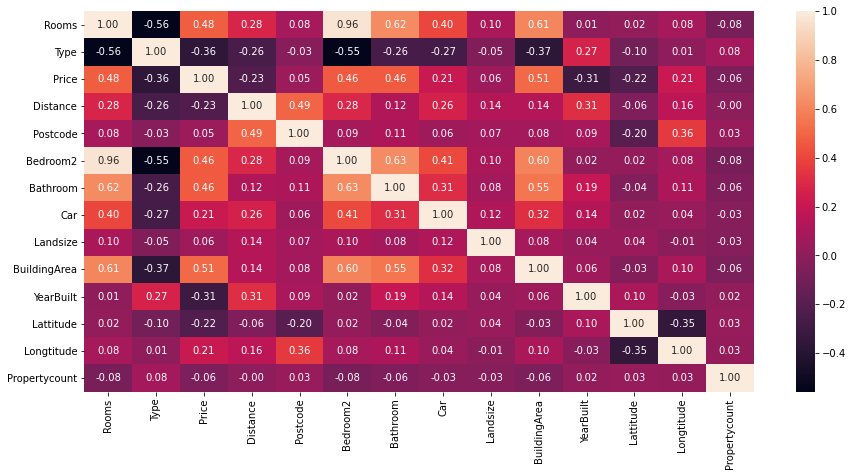

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method="pearson"), ax=ax, annot=True, fmt='.2f');

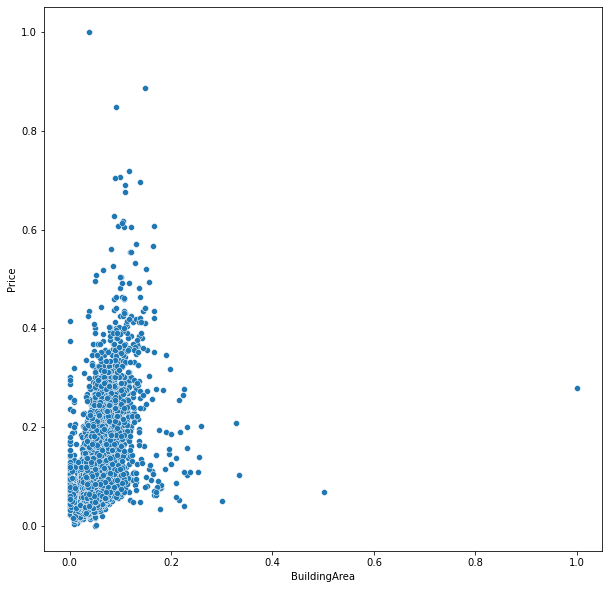

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x="BuildingArea", y="Price", data=data);

## Аналитическое восстановление зависимости

In [10]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array, y_array):
  x_mean = np.mean(x_array)
  y_mean = np.mean(y_array)
  var1 = np.sum([(x-x_mean)**2 for x in x_array])
  cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
  b1 = cov1 / var1
  b0 = y_mean - b1*x_mean
  return b0, b1

In [11]:
x_array = data["BuildingArea"].values
y_array = data["Price"].values

b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(0.04246890358963856, 1.3753562780775)

In [12]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array, b0, b1):
  res = [b1*x+b0 for x in x_array]
  return res

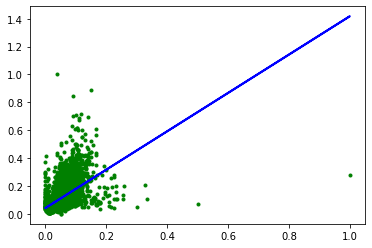

In [13]:
y_array_regr = y_regr(x_array, b0, b1)

plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

## Градиентный спуск

In [14]:
# Простейшая реализация градиентного спуска
def gradient_descent(x_array, y_array, b0_0, b1_0, epochs, learning_rate = 0.001):
  # Значения для коэффициентов по умолчанию
  b0, b1 = b0_0, b1_0
  k = float(len(x_array))
  for i in range(epochs): 
    # Вычисление новых предсказанных значений
    # используется векторизованное умножение и сложение для вектора и константы
    y_pred = b1 * x_array + b0
    # Расчет градиентов
    # np.multiply - поэлементное умножение векторов
    dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
    dL_db0 = (-2/k) * np.sum(y_array - y_pred)
    # Изменение значений коэффициентов:
    b1 = b1 - learning_rate * dL_db1
    b0 = b0 - learning_rate * dL_db0
  # Результирующие значения
  y_pred = b1 * x_array + b0
  return b0, b1, y_pred

In [15]:
from sklearn.metrics import mean_squared_error

def show_gradient_descent(epochs, b0_0, b1_0):
  grad_b0, grad_b1, grad_y_pred = gradient_descent(x_array, y_array, b0_0, b1_0, epochs)
  print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
  print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
  print('MSE = {}'.format(mean_squared_error(y_array_regr, grad_y_pred)))
  plt.plot(x_array, y_array, 'g.')
  plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
  plt.plot(x_array, grad_y_pred, 'r', linewidth=2.0)
  plt.show()

b0 = 0.04246890358963856 - (теоретический), 0.07428334974682356 - (градиентный спуск)
b1 = 1.3753562780775 - (теоретический), 0.7127880672027471 - (градиентный спуск)
MSE = 0.000350400264290011


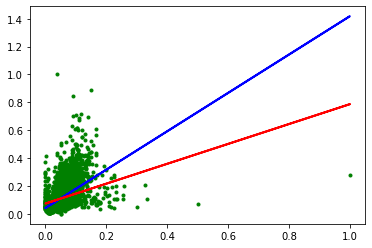

In [16]:
# Примеры использования градиентного спуска
show_gradient_descent(10000, 0.03, 0.7)

# Линейная регрессия

In [17]:
from sklearn.linear_model import LinearRegression

# Обучим линейную регрессию и сравним коэффициенты с рассчитанными ранее
reg1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, reg1.coef_), (b0, reg1.intercept_)

((1.3753562780775, array([[1.37535628]])),
 (0.04246890358963856, array([0.0424689])))

# SVM

In [18]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

def plot_regr(clf):
  title = clf.__repr__
  clf.fit(x_array.reshape(-1, 1), y_array)
  y_pred = clf.predict(x_array.reshape(-1, 1))
  fig, ax = plt.subplots(figsize=(5,5))
  ax.set_title(title)
  ax.plot(x_array, y_array, 'b.')
  ax.plot(x_array, y_pred, 'ro')
  plt.show()

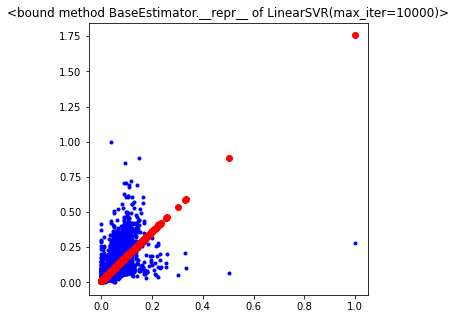

In [19]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

In [20]:
from sklearn.model_selection import train_test_split

data_X = data.loc[:, [x for x in data.columns if x != "Price"]]
data_Y = data.loc[:, 'Price']
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
  data_X,
  data_Y,
  test_size=0.2,
  random_state=1
)

In [21]:
svr = SVR()
svr.fit(data_X_train, data_y_train);

In [22]:
y_pred = svr.predict(data_X_test)

In [23]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(data_y_test, y_pred), \
  mean_squared_error(data_y_test, y_pred)

(0.038585847903955375, 0.002505164793981792)

# Деревья решений

In [24]:
# Обучим дерево и предскажем результаты
from sklearn.tree import DecisionTreeRegressor

tree_regr = DecisionTreeRegressor(random_state=1).fit(data_X_train, data_y_train)
y_test_predict = tree_regr.predict(data_X_test)
y_test_predict.shape

(1778,)

In [25]:
mean_absolute_error(data_y_test, y_test_predict), \
  mean_squared_error(data_y_test, y_test_predict)

(0.026408393589430253, 0.0020832484096994825)

In [26]:
list(
  zip(
    data_X_train.columns.values,
    tree_regr.feature_importances_
  )
)

[('Rooms', 0.00865085861613802),
 ('Type', 0.014525874739100542),
 ('Distance', 0.16045795446093078),
 ('Postcode', 0.0895050939175147),
 ('Bedroom2', 0.004132298491441494),
 ('Bathroom', 0.01767464356317414),
 ('Car', 0.007804644277085554),
 ('Landsize', 0.07241880178985916),
 ('BuildingArea', 0.36874611122098755),
 ('YearBuilt', 0.11338884954959474),
 ('Lattitude', 0.07555105034729982),
 ('Longtitude', 0.05337760733323606),
 ('Propertycount', 0.013766211693637648)]

In [27]:
# Визуализация дерева
from sklearn.tree import export_graphviz
from io import StringIO
import pydot

def get_png_tree(tree_model_param, feature_names_param):
  dot_data = StringIO()
  export_graphviz(
    tree_model_param, out_file=dot_data,
    feature_names=feature_names_param, filled=True,
    rounded=True, special_characters=True
  )
  (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
  return graph.create_png()

In [28]:
tree_regr_depth3 = DecisionTreeRegressor(
  random_state=1,
  max_depth=3
).fit(data_X_train, data_y_train)
tree_regr_depth3

DecisionTreeRegressor(max_depth=3, random_state=1)

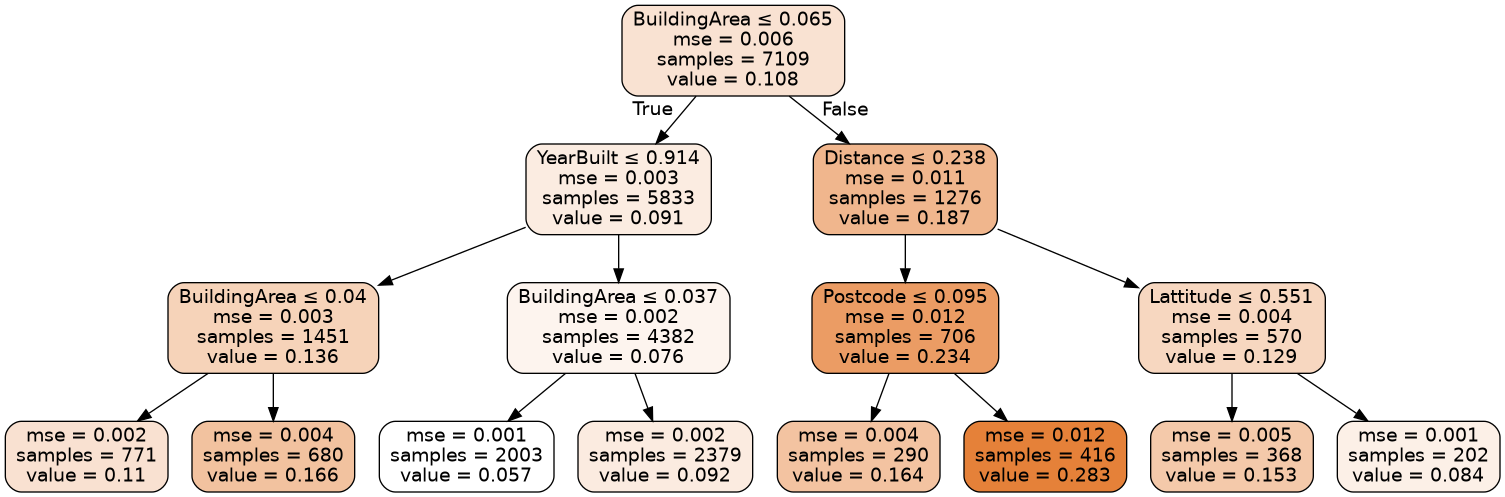

In [29]:
from IPython.display import Image
Image(get_png_tree(tree_regr_depth3, [x for x in data.columns if x != "Price"]), height='70%')